In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline
from fancyimpute import KNN, NuclearNormMinimization, SoftImpute, IterativeImputer, BiScaler
from fancyimpute import IterativeImputer

Using TensorFlow backend.


In [2]:
df=pd.read_excel('Chapter5_Imputation_DataSet.xlsx')

In [3]:
df.head(2)

,Surface Treating Pressure,Slurry Rate,Proppant Concentration
0,7913.0,64.4,0.0
1,8000.0,64.8,0.0


In [4]:
missing_val_count_by_column = (df.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

Surface Treating Pressure    164
dtype: int64


In [5]:
df.describe()

,Surface Treating Pressure,Slurry Rate,Proppant Concentration
count,4588.000000,4752.000000,4752.000000
mean,8142.469922,99.710795,1.422033
std,85.671249,3.308136,0.703032
min,7913.000000,64.400000,0.000000
25%,8088.000000,99.900000,1.000000
50%,8116.000000,100.300000,1.500000
75%,8193.000000,100.700000,2.000000
max,8708.000000,101.600000,3.500000


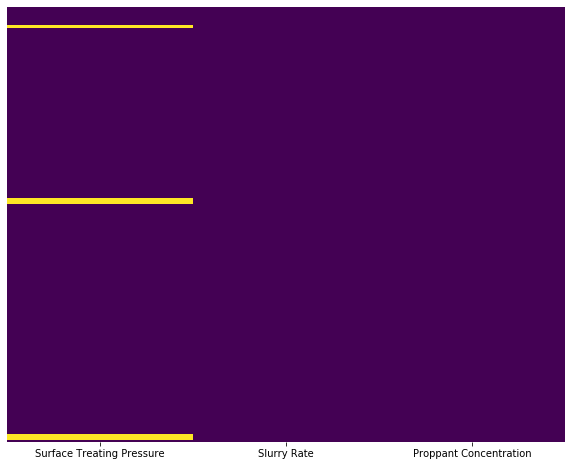

In [6]:
#Shows a heatmap of the missing values across the whole data set
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

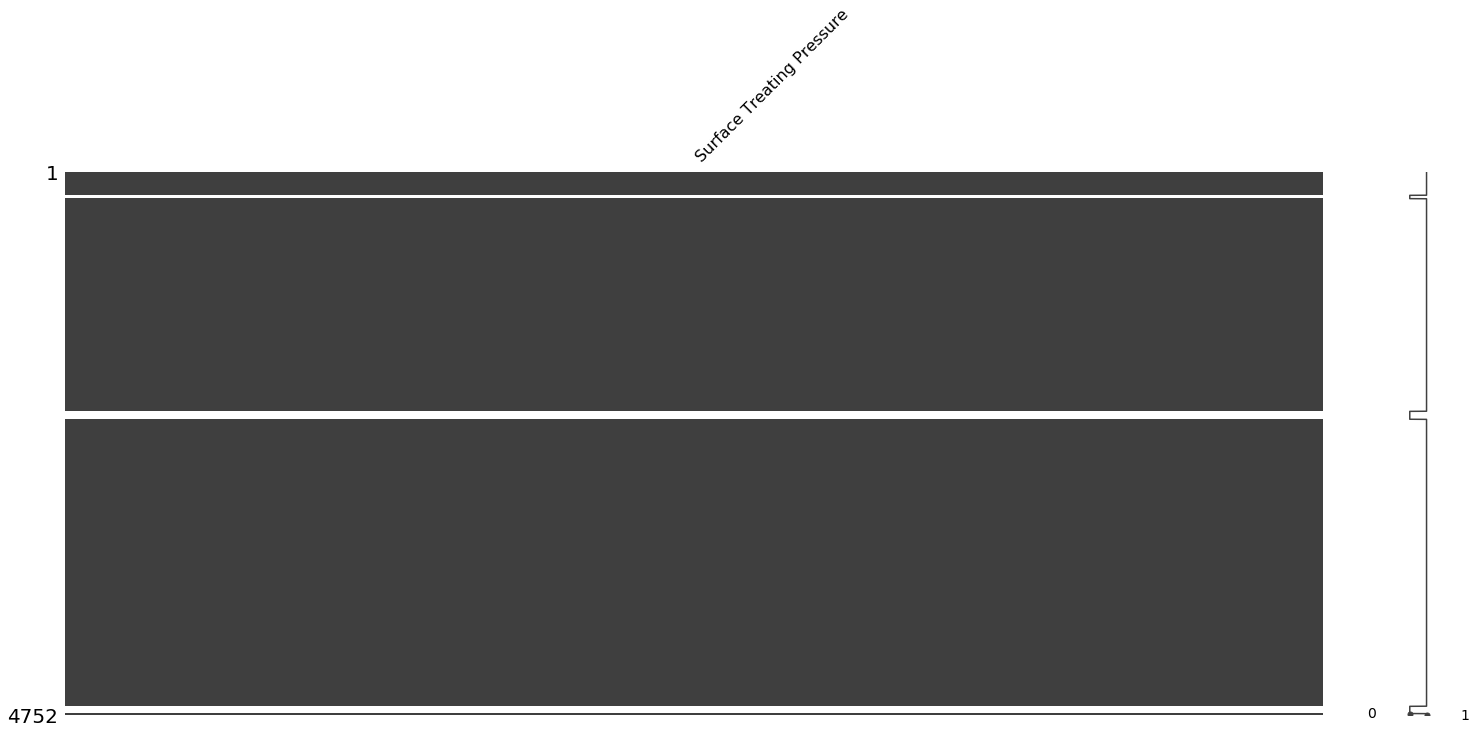

In [7]:
missingdata_df=df.columns[df.isnull().any()].tolist()
msno.matrix(df[missingdata_df])

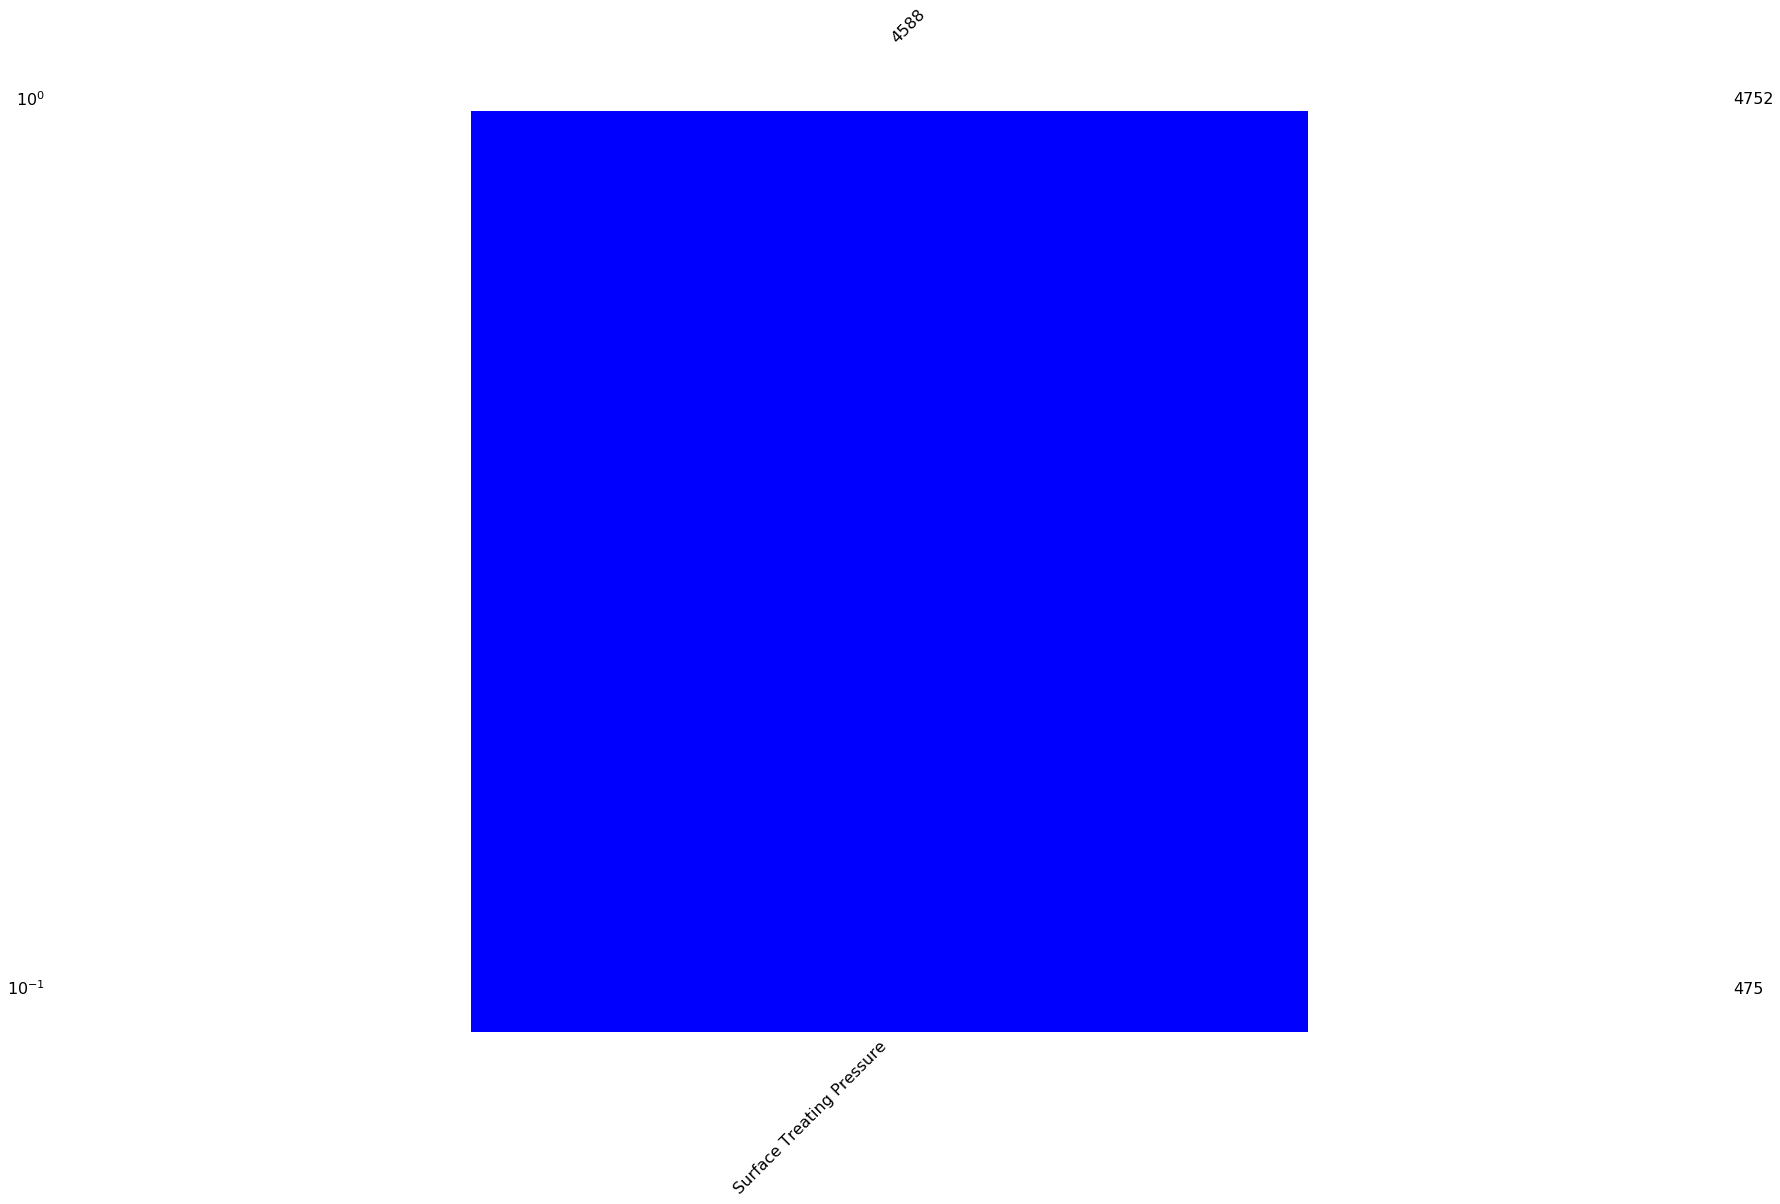

In [8]:
# Shows a bar chart of missing columns
msno.bar(df[missingdata_df], color="blue", log=True, figsize=(30,18))

In [9]:
df.columns

Index(['Surface Treating Pressure', 'Slurry Rate', 'Proppant Concentration'], dtype='object')

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
df_scaled=scaler.transform(df)
df_scaled=pd.DataFrame(df_scaled, columns=['Surface Treating Pressure', 'Slurry Rate', 'Proppant Concentration'])
df_scaled

,Surface Treating Pressure,Slurry Rate,Proppant Concentration
0,-2.678786,-10.675047,-2.022926
1,-1.663165,-10.554120,-2.022926
2,-1.091149,-10.433193,-2.022926
3,-0.717588,-10.282035,-2.022926
4,-0.122224,-10.070413,-2.022926
...,...,...,...
4747,-0.682566,-0.003264,-2.022926
4748,-0.659219,0.026968,-2.022926
4749,-0.495785,0.057200,-2.022926
4750,-0.554154,0.057200,-2.022926


In [11]:
df_scaled.describe()

,Surface Treating Pressure,Slurry Rate,Proppant Concentration
count,4.588000e+03,4.752000e+03,4.752000e+03
mean,-4.951454e-15,-1.846514e-15,1.456074e-14
std,1.000109e+00,1.000105e+00,1.000105e+00
min,-2.678786e+00,-1.067505e+01,-2.022926e+00
25%,-6.358710e-01,5.719971e-02,-6.003667e-01
50%,-3.090046e-01,1.781264e-01,1.109129e-01
75%,5.898780e-01,2.990532e-01,8.221926e-01
max,6.601885e+00,5.711383e-01,2.956032e+00


In [12]:
# Use # nearest rows which have a feature to fill in each row's missing features
X_filled_knn = KNN(k=2).fit_transform(df_scaled)
X_filled_knn=pd.DataFrame(X_filled_knn,columns=['Surface Treating Pressure', 'Slurry Rate', 'Proppant Concentration'])
X_filled_knn

Imputing row 1/4752 with 0 missing, elapsed time: 12.858
Imputing row 101/4752 with 0 missing, elapsed time: 12.861
Imputing row 201/4752 with 0 missing, elapsed time: 12.863
Imputing row 301/4752 with 0 missing, elapsed time: 12.869
Imputing row 401/4752 with 0 missing, elapsed time: 12.871
Imputing row 501/4752 with 0 missing, elapsed time: 12.874
Imputing row 601/4752 with 0 missing, elapsed time: 12.877
Imputing row 701/4752 with 0 missing, elapsed time: 12.880
Imputing row 801/4752 with 0 missing, elapsed time: 12.882
Imputing row 901/4752 with 0 missing, elapsed time: 12.884
Imputing row 1001/4752 with 0 missing, elapsed time: 12.886
Imputing row 1101/4752 with 0 missing, elapsed time: 12.887
Imputing row 1201/4752 with 0 missing, elapsed time: 12.889
Imputing row 1301/4752 with 0 missing, elapsed time: 12.891
Imputing row 1401/4752 with 0 missing, elapsed time: 12.896
Imputing row 1501/4752 with 0 missing, elapsed time: 12.898
Imputing row 1601/4752 with 0 missing, elapsed time:

,Surface Treating Pressure,Slurry Rate,Proppant Concentration
0,-2.678786,-10.675047,-2.022926
1,-1.663165,-10.554120,-2.022926
2,-1.091149,-10.433193,-2.022926
3,-0.717588,-10.282035,-2.022926
4,-0.122224,-10.070413,-2.022926
...,...,...,...
4747,-0.682566,-0.003264,-2.022926
4748,-0.659219,0.026968,-2.022926
4749,-0.495785,0.057200,-2.022926
4750,-0.554154,0.057200,-2.022926


In [13]:
X_filled_knn['Surface Treating Pressure']=(X_filled_knn['Surface Treating Pressure']*df['Surface Treating Pressure'].std())+df['Surface Treating Pressure'].mean()
X_filled_knn['Slurry Rate']=(X_filled_knn['Slurry Rate']*df['Slurry Rate'].std())+df['Slurry Rate'].mean()
X_filled_knn['Proppant Concentration']=(X_filled_knn['Proppant Concentration']*df['Proppant Concentration'].std())+df['Proppant Concentration'].mean()

In [14]:
X_filled_knn

,Surface Treating Pressure,Slurry Rate,Proppant Concentration
0,7912.974988,64.396284,-0.00015
1,7999.984471,64.796326,-0.00015
2,8048.989812,65.196368,-0.00015
3,8080.993300,65.696421,-0.00015
4,8131.998859,66.396495,-0.00015
...,...,...,...
4747,8083.993627,99.699999,-0.00015
4748,8085.993845,99.800009,-0.00015
4749,8099.995371,99.900020,-0.00015
4750,8094.994826,99.900020,-0.00015


In [15]:
X_filled_knn.to_csv('KNN_Imputation.csv', index=False)

# Applying MICE

In [16]:
#Appying MICE Imputations
from impyute.imputation.cs import mice
imputed_training=mice(df_scaled.values)
imputed_training=pd.DataFrame(imputed_training,columns=['Surface Treating Pressure', 'Slurry Rate', 'Proppant Concentration'])

In [17]:
imputed_training['Surface Treating Pressure']=(imputed_training['Surface Treating Pressure']*df['Surface Treating Pressure'].std())+df['Surface Treating Pressure'].mean()
imputed_training['Slurry Rate']=(imputed_training['Slurry Rate']*df['Slurry Rate'].std())+df['Slurry Rate'].mean()
imputed_training['Proppant Concentration']=(imputed_training['Proppant Concentration']*df['Proppant Concentration'].std())+df['Proppant Concentration'].mean()

In [18]:
imputed_training

,Surface Treating Pressure,Slurry Rate,Proppant Concentration
0,7912.974988,64.396284,-0.00015
1,7999.984471,64.796326,-0.00015
2,8048.989812,65.196368,-0.00015
3,8080.993300,65.696421,-0.00015
4,8131.998859,66.396495,-0.00015
...,...,...,...
4747,8083.993627,99.699999,-0.00015
4748,8085.993845,99.800009,-0.00015
4749,8099.995371,99.900020,-0.00015
4750,8094.994826,99.900020,-0.00015


In [19]:
imputed_training.to_csv('MICE_Imputation.csv', index=False)

In [20]:
df.columns

Index(['Surface Treating Pressure', 'Slurry Rate', 'Proppant Concentration'], dtype='object')

# Iterative imputer

In [21]:
from fancyimpute import IterativeImputer

In [22]:
#Model each feature with missing values as a function of other features, and use that estimate for imputation.
X_filled_ii = IterativeImputer(max_iter=10).fit_transform(df_scaled)
X_filled_ii=pd.DataFrame(X_filled_ii,columns=['Surface Treating Pressure', 'Slurry Rate', 'Proppant Concentration'])

In [23]:
X_filled_ii['Surface Treating Pressure']=(X_filled_ii['Surface Treating Pressure']*df['Surface Treating Pressure'].std())+df['Surface Treating Pressure'].mean()
X_filled_ii['Slurry Rate']=(X_filled_ii['Slurry Rate']*df['Slurry Rate'].std())+df['Slurry Rate'].mean()
X_filled_ii['Proppant Concentration']=(X_filled_ii['Proppant Concentration']*df['Proppant Concentration'].std())+df['Proppant Concentration'].mean()

In [24]:
X_filled_ii.to_csv('Iterative_Imputer_Imputation.csv', index=False)

# Applying iterative imputer 5 times

In [25]:
#Applying iterative imputer 5 times and taking the mean
from fancyimpute import IterativeImputer
XY_incomplete = df_scaled

n_imputations = 5
XY_completed = []
for i in range(n_imputations):
    imputer = IterativeImputer(sample_posterior=True, random_state=i)
    XY_completed.append(imputer.fit_transform(XY_incomplete))

XY_completed_mean = np.mean(XY_completed, 0)
XY_completed_std = np.std(XY_completed, 0)

XY_completed=np.array(XY_completed)
XY_completed_mean=pd.DataFrame(XY_completed_mean,columns=['Surface Treating Pressure', 'Slurry Rate', 'Proppant Concentration'])

In [26]:
XY_completed_mean['Surface Treating Pressure']=(XY_completed_mean['Surface Treating Pressure']*df['Surface Treating Pressure'].std())+df['Surface Treating Pressure'].mean()
XY_completed_mean['Slurry Rate']=(XY_completed_mean['Slurry Rate']*df['Slurry Rate'].std())+df['Slurry Rate'].mean()
XY_completed_mean['Proppant Concentration']=(XY_completed_mean['Proppant Concentration']*df['Proppant Concentration'].std())+df['Proppant Concentration'].mean()

In [27]:
XY_completed_mean.to_csv('Mean_Iterative_Imputer.csv', index=False)